# Machine Learning Project - IA mention CentraleSupélec

Under the supervision of :

- Myriam TAMI

Students:

- Lucas Tramonte
- Gabriel Souza Lima

# Libraries


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer

# EDA

In [47]:
data_original = pd.read_csv('Assets/Data/welddb.csv', delimiter='\s+', header=None)

In [49]:
len(data_original.columns)

44

In [95]:
data = data_original.copy()

# Name the columns
data.columns = [
    'Carbon concentration (weight%)', 
    'Silicon concentration (weight%)', 
    'Manganese concentration (weight%)', 
    'Sulphur concentration (weight%)', 
    'Phosphorus concentration (weight%)', 
    'Nickel concentration (weight%)', 
    'Chromium concentration (weight%)', 
    'Molybdenum concentration (weight%)', 
    'Vanadium concentration (weight%)', 
    'Copper concentration (weight%)', 
    'Cobalt concentration (weight%)', 
    'Tungsten concentration (weight%)', 
    'Oxygen concentration (ppm by weight)', 
    'Titanium concentration (ppm by weight)', 
    'Nitrogen concentration (ppm by weight)', 
    'Aluminium concentration (ppm by weight)', 
    'Boron concentration (ppm by weight)', 
    'Niobium concentration (ppm by weight)', 
    'Tin concentration (ppm by weight)', 
    'Arsenic concentration (ppm by weight)', 
    'Antimony concentration (ppm by weight)', 
    'Current (A)', 
    'Voltage (V)', 
    'AC or DC', 
    'Electrode positive or negative', 
    'Heat input (kJ/mm)', 
    'Interpass temperature (°C)', 
    'Type of weld', 
    'Post weld heat treatment temperature (°C)', 
    'Post weld heat treatment time (hours)', 
    'Yield strength (MPa)', 
    'Ultimate tensile strength (MPa)', 
    'Elongation (%)', 
    'Reduction of Area (%)', 
    'Charpy temperature (°C)', 
    'Charpy impact toughness (J)', 
    'Hardness (kg/mm2)', 
    '50% FATT', 
    'Primary ferrite in microstructure (%)', 
    'Ferrite with second phase (%)', 
    'Acicular ferrite (%)', 
    'Martensite (%)', 
    'Ferrite with carbide aggregate (%)', 
    'Weld ID'
]

data

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (°C),Charpy impact toughness (J),Hardness (kg/mm2),50% FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38


Percentage of 'N' values in each column

In [177]:
percent_n = (data == 'N').mean() 
percent_n_sorted = percent_n.sort_values(ascending=False)
percent_n_sorted

50% FATT                                     0.981235
Tungsten concentration (weight%)             0.954600
Ferrite with carbide aggregate (%)           0.946126
Martensite (%)                               0.946126
Ferrite with second phase (%)                0.945521
Acicular ferrite (%)                         0.945521
Primary ferrite in microstructure (%)        0.940678
Cobalt concentration (weight%)               0.921913
Hardness (kg/mm2)                            0.916465
Arsenic concentration (ppm by weight)        0.858354
Antimony concentration (ppm by weight)       0.842615
Tin concentration (ppm by weight)            0.820823
Boron concentration (ppm by weight)          0.694915
Copper concentration (weight%)               0.650121
Nickel concentration (weight%)               0.578087
Elongation (%)                               0.576271
Reduction of Area (%)                        0.573245
Ultimate tensile strength (MPa)              0.553269
Niobium concentration (ppm b

- The presence of an ``N'' indicates that the value was not reported in the publication. This is NOT meant to be an indication that the value is zero.

- It wouldn't make sense to set the phosphorus and sulfur concentrations to zero when their values aren't reported, because these impurity elements are inevitably present in welds in practice. 
    -   Therefore, we'll use the average values for these concentrations in such cases. 
    -   On the other hand, for other elements like manganese and nickel, it is reasonable to set their concentrations to zero if they are not reported. This is because they wouldn't be deliberate additions and their concentrations would be close to the detection limits of the commonly used analytical techniques [1].

In [194]:
# Removing columns with more than 60% missing values
cols_to_drop = percent_n_sorted[percent_n_sorted > 0.6].index
print(cols_to_drop)

data_clean = data.drop(columns = cols_to_drop)

Index(['50% FATT', 'Tungsten concentration (weight%)',
       'Ferrite with carbide aggregate (%)', 'Martensite (%)',
       'Ferrite with second phase (%)', 'Acicular ferrite (%)',
       'Primary ferrite in microstructure (%)',
       'Cobalt concentration (weight%)', 'Hardness (kg/mm2)',
       'Arsenic concentration (ppm by weight)',
       'Antimony concentration (ppm by weight)',
       'Tin concentration (ppm by weight)',
       'Boron concentration (ppm by weight)',
       'Copper concentration (weight%)'],
      dtype='object')


In [179]:
print("Orginal data shape: ", data.shape, "\nCleaned data shape: ",data_clean.shape)

Orginal data shape:  (1652, 44) 
Cleaned data shape:  (1652, 30)


### Imputation
By analysing the distribution of numeric values, we can clearly see that none feature has a normal distribution. In this case, it is best recommended to use median as Imputer. Besides, we see that only Elongation and Reduction of Area have negative skewness. Taking into account these results, we proceed aplying logarithm to Silicon, Sulphur, Phosphorus, Nickel, Titanium, Nitrogen and Oxygen concentrations besides to Voltage and Heat input.

In [268]:
data_clean = data_clean.replace({"N": np.nan})

categoric_features = ['AC or DC', 'Electrode positive or negative', 'Type of weld']  # Weld ID isn't important

# Convert columns to numeric
numeric_features = data_clean.drop(columns=['Weld ID', 'AC or DC', 'Electrode positive or negative', 'Type of weld']).columns
data_clean[numeric_features] = data_clean[numeric_features].apply(pd.to_numeric, errors='coerce')

# Loop to apply the analysis to all columns in numeric_features
for feature in numeric_features:
    df_temp = data_clean[feature]
    df_temp = df_temp[df_temp.notna()]
    print(f"Analysis for the column: {feature}")
    
    # Normality test (Shapiro-Wilk)
    stat, p_value = stats.shapiro(df_temp)
    print(f'Shapiro-Wilk Test for {feature}: stat={stat:.3f}, p={p_value:.3f}')
    
    # Skewness and Kurtosis
    print(f'Skewness for {feature}:', df_temp.skew())
    print(f'Kurtosis for {feature}:', df_temp.kurt())
    print("\n" + "-"*50 + "\n")  # Separator between columns

Analysis for the column: Carbon concentration (weight%)
Shapiro-Wilk Test for Carbon concentration (weight%): stat=0.943, p=0.000
Skewness for Carbon concentration (weight%): 0.8330875639359343
Kurtosis for Carbon concentration (weight%): 1.3263842798265717

--------------------------------------------------

Analysis for the column: Silicon concentration (weight%)
Shapiro-Wilk Test for Silicon concentration (weight%): stat=0.894, p=0.000
Skewness for Silicon concentration (weight%): 1.6239557792674093
Kurtosis for Silicon concentration (weight%): 8.117286897023359

--------------------------------------------------

Analysis for the column: Manganese concentration (weight%)
Shapiro-Wilk Test for Manganese concentration (weight%): stat=0.973, p=0.000
Skewness for Manganese concentration (weight%): 0.0840610517935515
Kurtosis for Manganese concentration (weight%): -0.62668808524064

--------------------------------------------------

Analysis for the column: Sulphur concentration (weigh

In [270]:
log_columns = ['Silicon concentration (weight%)',
               'Sulphur concentration (weight%)',
               'Phosphorus concentration (weight%)',
               'Nickel concentration (weight%)',
               'Titanium concentration (ppm by weight)',
               'Nitrogen concentration (ppm by weight)',
               'Oxygen concentration (ppm by weight)',
               'Voltage (V)',
               'Heat input (kJ/mm)']

# Apply logarithmic transformation (log(x + 1)) to avoid issues with zero values
data_clean[log_columns] = data_clean[log_columns].apply(lambda x: np.log(x + 1))

# Check the result
data_clean[log_columns].head()

,Silicon concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Titanium concentration (ppm by weight),Nitrogen concentration (ppm by weight),Oxygen concentration (ppm by weight),Voltage (V),Heat input (kJ/mm)
0,0.232986,0.007937,0.011858,0.0,NaN,NaN,NaN,1.4088,0.526589
1,0.232986,0.007937,0.011858,0.0,NaN,NaN,NaN,1.4088,0.526589
2,0.232986,0.007937,0.011858,0.0,NaN,NaN,NaN,1.4088,0.526589
3,0.239038,0.006951,0.013807,0.0,NaN,NaN,NaN,1.4088,0.526589
4,0.239038,0.006951,0.013807,0.0,NaN,NaN,NaN,1.4088,0.526589


In [5]:
"""mean_phosphorus = data_numeric['Phosphorus concentration (weight%)'].dropna().astype(float).mean()
mean_sulphur = data_numeric['Sulphur concentration (weight%)'].dropna().astype(float).mean()

# Replace NaNs with average values for Phosphorus and Sulphur
data_numeric['Phosphorus concentration (weight%)'] = data_numeric['Phosphorus concentration (weight%)'].fillna(mean_phosphorus)
data_numeric['Sulphur concentration (weight%)'] = data_numeric['Sulphur concentration (weight%)'].fillna(mean_sulphur)

# Replace NaNs with 0 for the other columns
data_numeric = data_numeric.fillna(0)
data_categoric = data_categoric.fillna(0)

data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].replace([0, '0'], '0')
data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].astype("category")

# Concatenate dataframes

data_all = pd.concat([data_numeric, data_categoric], axis = 1)"""

In [271]:
imputer_median = SimpleImputer(strategy = "median")
imputer_mode = SimpleImputer(strategy = "most_frequent")

data_imputed = data_clean.copy()

# for the concentration columns, we will set the values to zero for elements different from Phosphorus and Sulphur
concentration_features = [col for col in data_clean.columns if "concentration" in col and not("Phosphorus" in col or "Sulphur" in col)]
other_numeric_features = [col for col in numeric_features if col not in concentration_features]

data_imputed[concentration_features] = data_imputed[concentration_features].fillna(0)

data_imputed[other_numeric_features] = imputer_median.fit_transform(data_imputed[other_numeric_features])
data_imputed[categoric_features] = imputer_mode.fit_transform(data_imputed[categoric_features])

In [262]:
print("Number of missing values after imputing: ", data_imputed[data_imputed.isnull().any(axis=1)].shape[0])

Number of missing values after imputing:  0


Numeric features

In [272]:
data_all = data_imputed.drop_duplicates(keep='last') #9 duplicated rows

# Reorder columns for better visualization
cols = numeric_features.tolist()

data_numeric = data_all[cols]

data_numeric.describe()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Oxygen concentration (ppm by weight),...,Heat input (kJ/mm),Interpass temperature (°C),Post weld heat treatment temperature (°C),Post weld heat treatment time (hours),Yield strength (MPa),Ultimate tensile strength (MPa),Elongation (%),Reduction of Area (%),Charpy temperature (°C),Charpy impact toughness (J)
count,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,...,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,0.075521,0.245498,1.202821,0.009346,0.012473,0.078387,0.997214,0.230002,0.027188,1.483650,...,0.634505,204.789952,304.243947,5.025654,501.401090,583.937107,26.577845,73.634322,-37.130145,93.449758
std,0.023898,0.062110,0.382137,0.009980,0.015969,0.191367,2.333634,0.408268,0.068649,0.834202,...,0.169448,39.099712,284.412831,6.077966,64.147779,59.960597,3.196226,6.040234,25.475621,37.060290
min,0.029000,0.038471,0.270000,0.000999,0.001996,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.385265,20.000000,0.000000,0.000000,315.000000,447.000000,10.600000,17.000000,-114.000000,3.000000
25%,0.061750,0.214318,0.940000,0.005964,0.006951,0.000000,0.000000,0.000000,0.000000,1.820235,...,0.526589,200.000000,0.000000,0.000000,495.000000,575.500000,26.800000,75.000000,-42.000000,100.000000
50%,0.074000,0.245008,1.270000,0.006951,0.009901,0.000000,0.000000,0.000000,0.000000,1.945047,...,0.526589,200.000000,250.000000,2.000000,495.000000,575.500000,26.800000,75.000000,-40.000000,100.000000
75%,0.086000,0.268105,1.440000,0.009901,0.013807,0.029130,0.402500,0.270000,0.010000,1.962640,...,0.741276,200.000000,580.000000,10.000000,495.000000,575.500000,26.800000,75.000000,-40.000000,100.000000
max,0.180000,0.565772,2.250000,0.123127,0.201424,0.917920,10.200000,1.500000,0.320000,2.129319,...,1.158782,300.000000,760.000000,24.000000,920.000000,1151.000000,37.000000,83.000000,188.000000,270.000000


In [290]:
"Type of weld" in data_all.columns

True

array([[<Axes: title={'center': 'Carbon concentration (weight%)'}>,
        <Axes: title={'center': 'Silicon concentration (weight%)'}>,
        <Axes: title={'center': 'Manganese concentration (weight%)'}>,
        <Axes: title={'center': 'Sulphur concentration (weight%)'}>,
        <Axes: title={'center': 'Phosphorus concentration (weight%)'}>],
       [<Axes: title={'center': 'Nickel concentration (weight%)'}>,
        <Axes: title={'center': 'Chromium concentration (weight%)'}>,
        <Axes: title={'center': 'Molybdenum concentration (weight%)'}>,
        <Axes: title={'center': 'Vanadium concentration (weight%)'}>,
        <Axes: title={'center': 'Oxygen concentration (ppm by weight)'}>],
       [<Axes: title={'center': 'Titanium concentration (ppm by weight)'}>,
        <Axes: title={'center': 'Nitrogen concentration (ppm by weight)'}>,
        <Axes: title={'center': 'Aluminium concentration (ppm by weight)'}>,
        <Axes: title={'center': 'Niobium concentration (ppm by wei

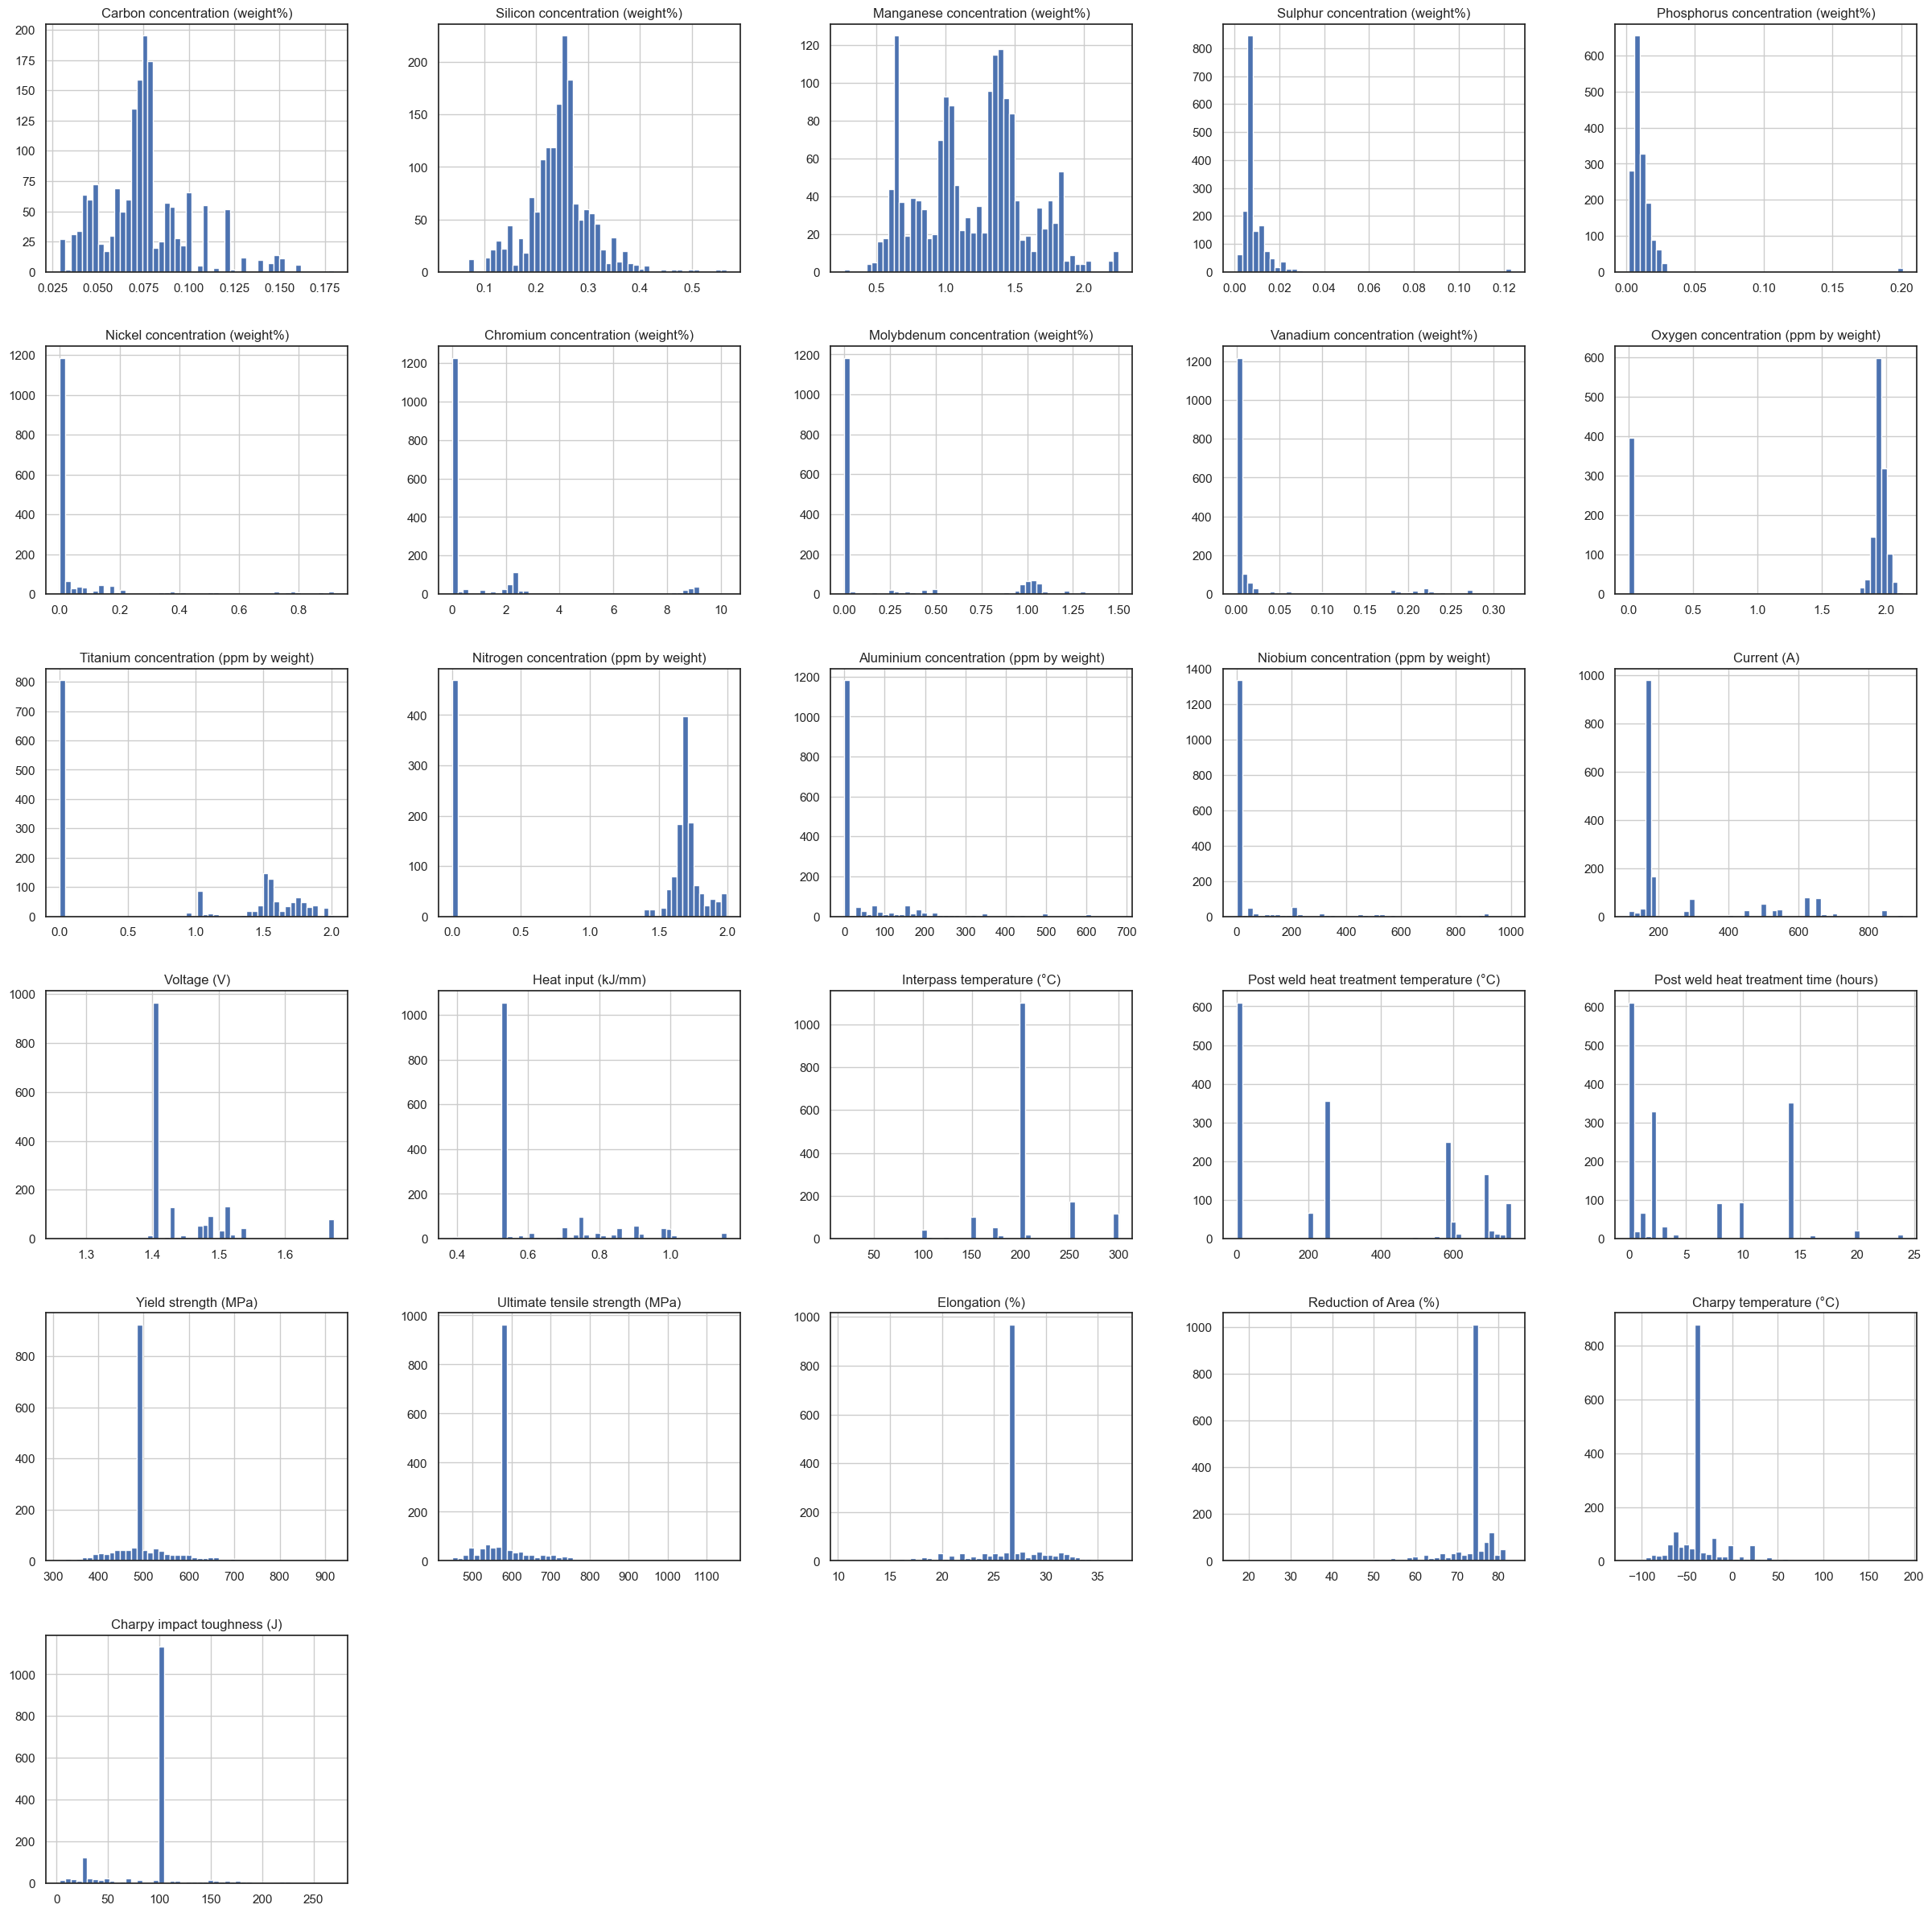

In [273]:
data_numeric.hist(bins = 50, figsize= (30,30))

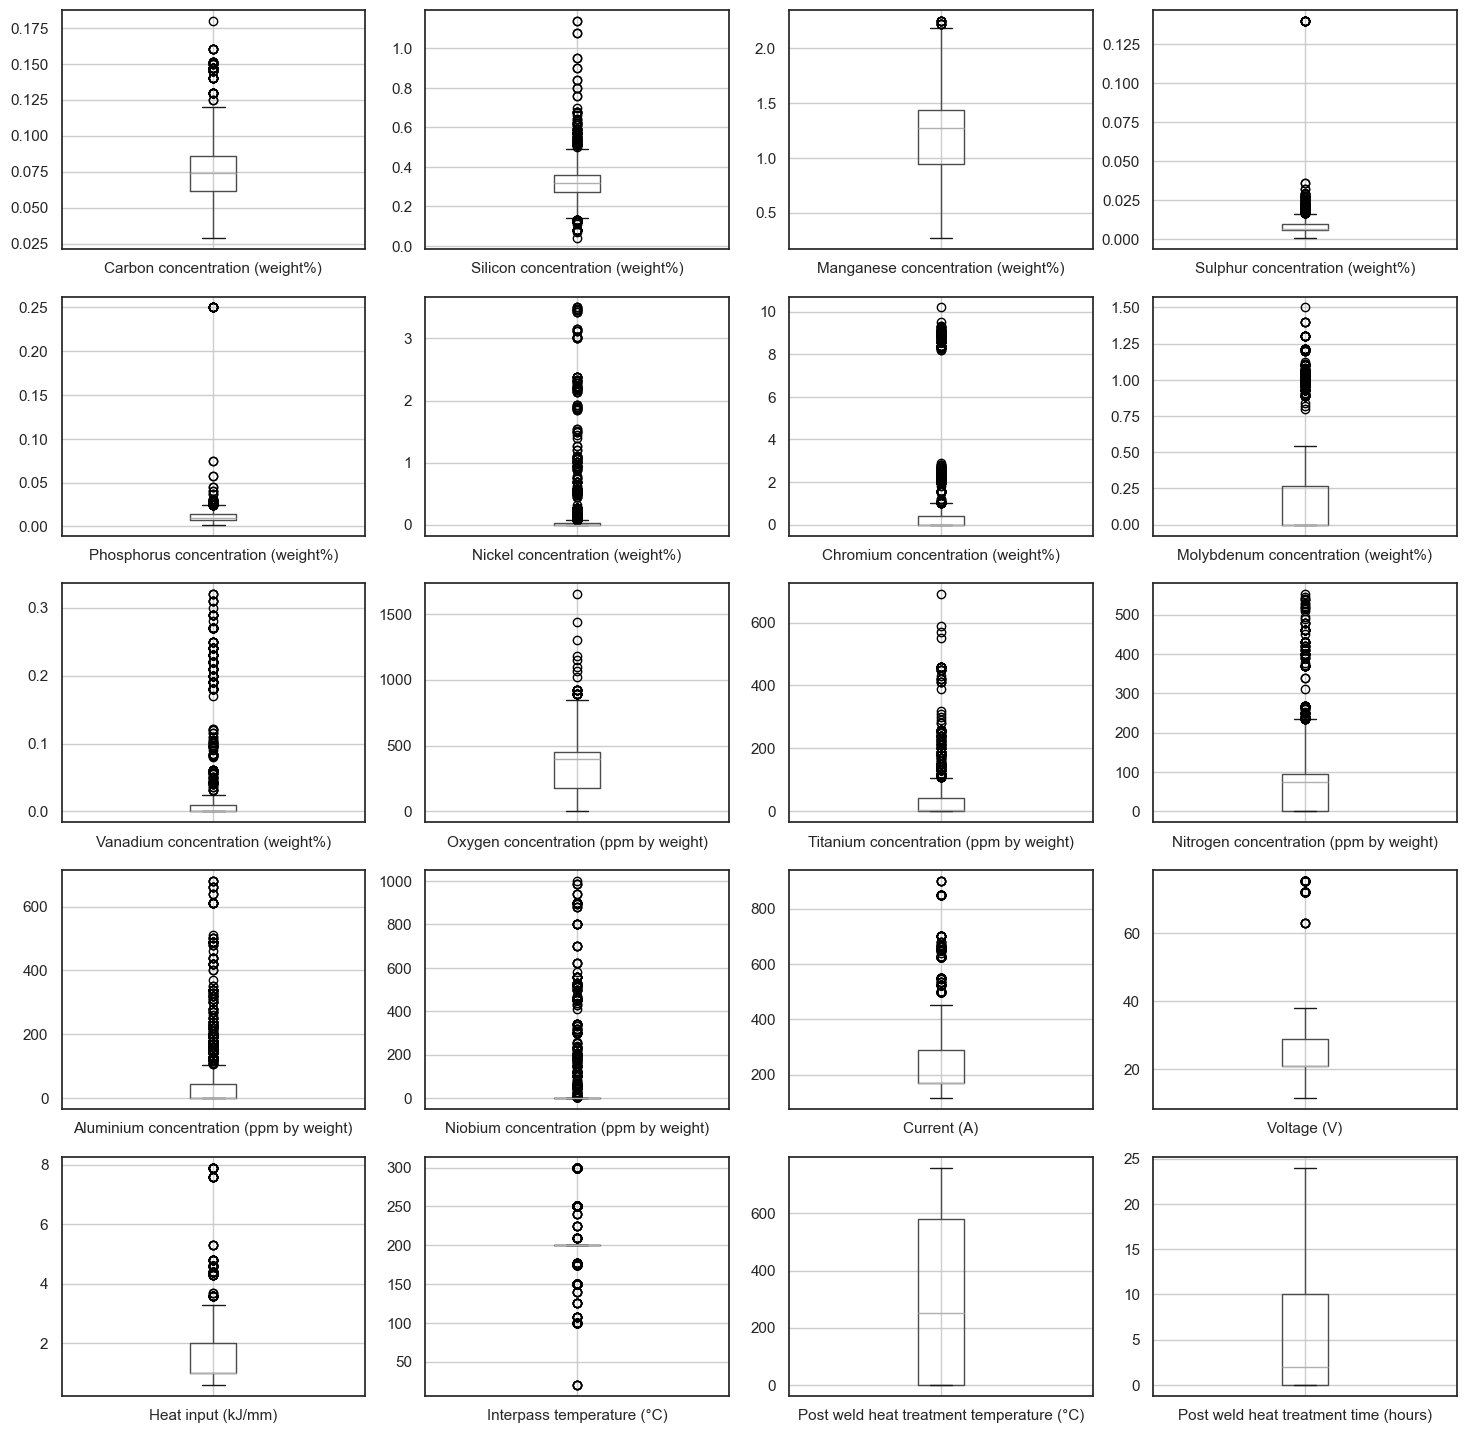

In [265]:
fig, axs = plt.subplots(5,4, figsize = (18,18))

for ax, col in zip(axs.flatten(), data_numeric.iloc[:,0:20].columns):
    data_numeric.iloc[:,0:20].boxplot(column = col, ax = ax)

In [274]:
data_numeric.corr().style.background_gradient(cmap="coolwarm")

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Oxygen concentration (ppm by weight),Titanium concentration (ppm by weight),Nitrogen concentration (ppm by weight),Aluminium concentration (ppm by weight),Niobium concentration (ppm by weight),Current (A),Voltage (V),Heat input (kJ/mm),Interpass temperature (°C),Post weld heat treatment temperature (°C),Post weld heat treatment time (hours),Yield strength (MPa),Ultimate tensile strength (MPa),Elongation (%),Reduction of Area (%),Charpy temperature (°C),Charpy impact toughness (J)
Carbon concentration (weight%),1.000000,-0.101928,0.062385,0.034031,-0.006138,-0.183336,0.163941,0.138725,0.313716,0.087948,0.039042,0.132282,0.066290,0.208727,0.361702,0.249472,0.279638,0.251903,0.106986,-0.089344,0.130874,0.165488,-0.150000,-0.267802,0.022864,-0.018673
Silicon concentration (weight%),-0.101928,1.000000,0.208394,-0.067706,-0.054588,-0.100731,-0.184470,-0.334470,-0.237487,0.018213,0.269111,-0.048553,0.460079,-0.099826,-0.133312,-0.227129,-0.167264,0.152155,-0.237404,-0.230302,0.028748,0.008464,0.087467,-0.035291,-0.100120,0.003540
Manganese concentration (weight%),0.062385,0.208394,1.000000,0.017914,0.043978,-0.114623,-0.269014,-0.324852,-0.157130,0.047718,0.164746,0.036858,0.125903,-0.112752,0.054168,0.029849,0.037563,0.056506,-0.311673,-0.218459,0.151414,0.144045,-0.018545,-0.073824,-0.036208,-0.034823
Sulphur concentration (weight%),0.034031,-0.067706,0.017914,1.000000,0.927389,0.028207,-0.026683,0.157421,0.070979,0.024117,-0.149661,0.060708,-0.045238,-0.078895,0.230140,0.296985,0.300086,0.021201,0.053754,-0.026319,0.039371,0.048888,-0.078990,-0.208426,0.144673,-0.082174
Phosphorus concentration (weight%),-0.006138,-0.054588,0.043978,0.927389,1.000000,0.066824,0.038355,0.172911,0.150208,-0.017527,-0.186738,0.062903,-0.006622,-0.036949,0.170418,0.221646,0.250943,-0.065418,0.074204,-0.024811,0.071778,0.065802,-0.079008,-0.166036,0.147369,-0.093716
Nickel concentration (weight%),-0.183336,-0.100731,-0.114623,0.028207,0.066824,1.000000,0.120472,0.108316,0.078799,-0.050821,-0.094084,-0.027859,-0.075766,0.043013,0.012651,-0.028329,0.044783,-0.121565,0.061868,0.095655,0.202323,0.179995,-0.093586,-0.100302,0.015409,-0.063705
Chromium concentration (weight%),0.163941,-0.184470,-0.269014,-0.026683,0.038355,0.120472,1.000000,0.717526,0.799663,0.107924,-0.332535,0.197303,-0.156742,0.621113,-0.056406,0.126752,-0.044593,-0.118898,0.528335,0.129474,0.219681,0.237610,-0.235097,-0.124564,0.201543,-0.060236
Molybdenum concentration (weight%),0.138725,-0.334470,-0.324852,0.157421,0.172911,0.108316,0.717526,1.000000,0.596661,0.146645,-0.420474,0.113721,-0.164644,0.351016,0.124350,0.259621,0.181030,-0.109469,0.619546,0.258345,0.228938,0.266020,-0.258317,-0.160841,0.247350,-0.059908
Vanadium concentration (weight%),0.313716,-0.237487,-0.157130,0.070979,0.150208,0.078799,0.799663,0.596661,1.000000,0.117803,-0.245005,0.243991,-0.124653,0.570318,0.085780,0.142898,0.101892,-0.070419,0.432108,0.093633,0.192067,0.195994,-0.185848,-0.135693,0.130666,-0.105965
Oxygen concentration (ppm by weight),0.087948,0.018213,0.047718,0.024117,-0.017527,-0.050821,0.107924,0.146645,0.117803,1.000000,0.372413,0.708533,0.135001,0.157955,0.043272,0.164606,0.049711,-0.083193,-0.143846,0.066150,-0.030809,0.027104,-0.097211,0.000500,-0.042999,-0.196447


- Sulphur concentration and Phosphorus concentration are highly correlated, then we must keep only one of them.
- Chromium, Molybdenum and Vanadium concentration are highly correlated, then we must keep only one of them.
- Elongation (%) and Reduction of Area (%) are highly correlated, then we must keep only one of them.
- Reduction of Area (%) are highly correlated with the target variables Yield strenght and Ultimate tensile strenght, then we must keep it on the prediction!!
- Yield strenght and Ultimate tensile strenght are highly correlated, then we should keep the Yield strenght on the prediction of the Ultimate tensile strenght !!

In [281]:
corr = data_numeric.corr()
corr_unstack = corr.unstack()

# Filter the diagonal (correlations of 1) and sort by absolute values
sorted_correlation_pairs = corr_unstack[corr_unstack != 1].abs().sort_values(ascending=False)

most_corr_pairs = sorted_correlation_pairs[sorted_correlation_pairs > 0.75]

# Print the most correlated pairs
print(most_corr_pairs.iloc[[i for i in range(0,len(most_corr_pairs),2)]])

Phosphorus concentration (weight%)  Sulphur concentration (weight%)     0.927389
Current (A)                         Heat input (kJ/mm)                  0.883803
Vanadium concentration (weight%)    Chromium concentration (weight%)    0.799663
Yield strength (MPa)                Ultimate tensile strength (MPa)     0.790294
dtype: float64


In [288]:
corr["Yield strength (MPa)"].sort_values(ascending=False).head(10)

Yield strength (MPa)                     1.000000
Ultimate tensile strength (MPa)          0.790294
Molybdenum concentration (weight%)       0.228938
Chromium concentration (weight%)         0.219681
Nickel concentration (weight%)           0.202323
Vanadium concentration (weight%)         0.192067
Niobium concentration (ppm by weight)    0.173301
Manganese concentration (weight%)        0.151414
Carbon concentration (weight%)           0.130874
Current (A)                              0.089563
Name: Yield strength (MPa), dtype: float64

In [289]:
corr["Ultimate tensile strength (MPa)"].sort_values(ascending=False).head(10)

Ultimate tensile strength (MPa)              1.000000
Yield strength (MPa)                         0.790294
Molybdenum concentration (weight%)           0.266020
Chromium concentration (weight%)             0.237610
Vanadium concentration (weight%)             0.195994
Nickel concentration (weight%)               0.179995
Carbon concentration (weight%)               0.165488
Niobium concentration (ppm by weight)        0.149365
Manganese concentration (weight%)            0.144045
Post weld heat treatment temperature (°C)    0.119095
Name: Ultimate tensile strength (MPa), dtype: float64

In [248]:
cols_to_drop = most_corr_pairs.reset_index().iloc[:,1].values.tolist()
cols_to_drop = np.delete(cols_to_drop, [6,7,8])
print(cols_to_drop)

['Sulphur concentration (weight%)' 'Phosphorus concentration (weight%)'
 'Heat input (kJ/mm)' 'Current (A)' 'Chromium concentration (weight%)'
 'Vanadium concentration (weight%)'
 'Nitrogen concentration (ppm by weight)']


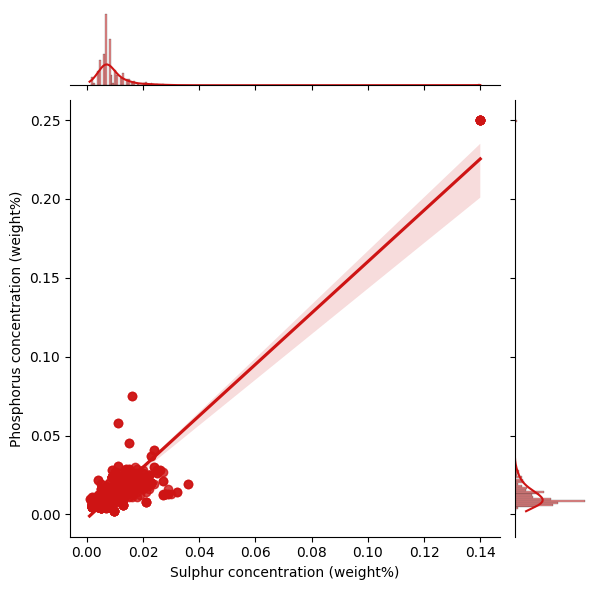

In [12]:
sns.jointplot(data = data_numeric, x = "Sulphur concentration (weight%)",y = "Phosphorus concentration (weight%)", kind="reg", color="#ce1414")

Categoric features

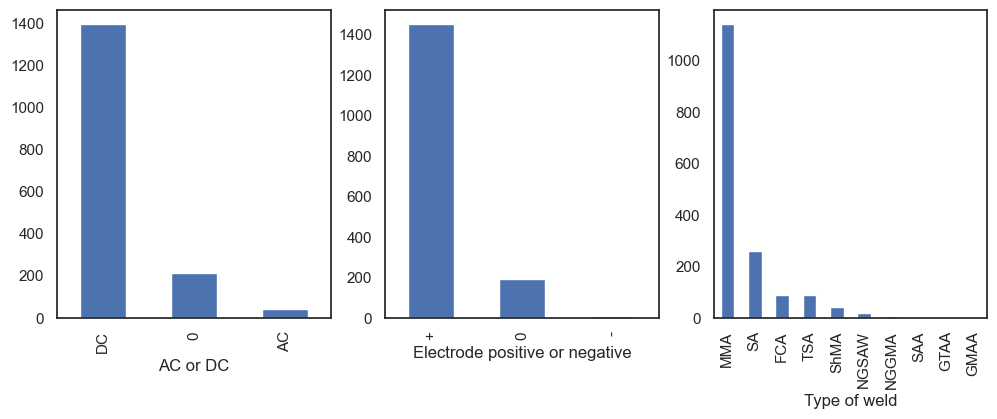

In [15]:
data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].replace([0, '0'], '0')
data_categoric["Electrode positive or negative"] = data_categoric["Electrode positive or negative"].astype("category")

fig, axs = plt.subplots(1, 3, figsize = (12,4))

for ax, col in zip(axs.flatten(), categoric_features):
    data_categoric[col].value_counts().plot(ax = ax, kind = 'bar')
    
plt.tight_layout
plt.show()

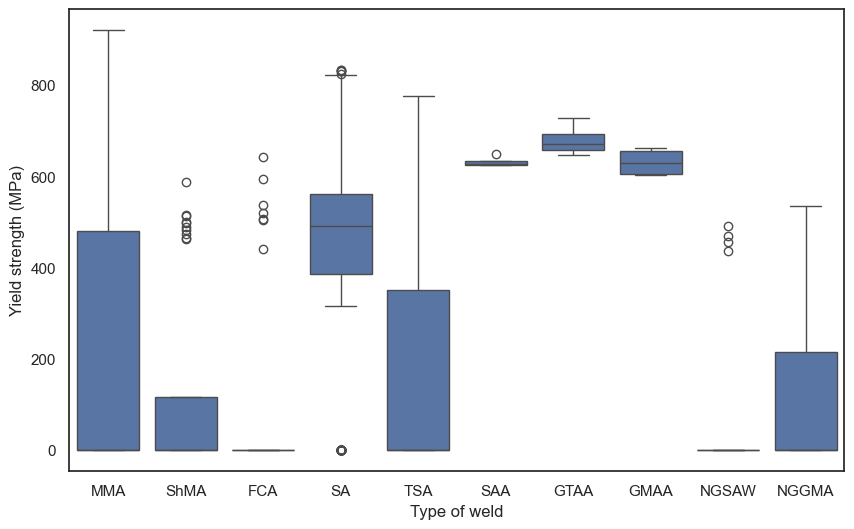

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data_all, x = "Type of weld", y = "Yield strength (MPa)")
plt.show()

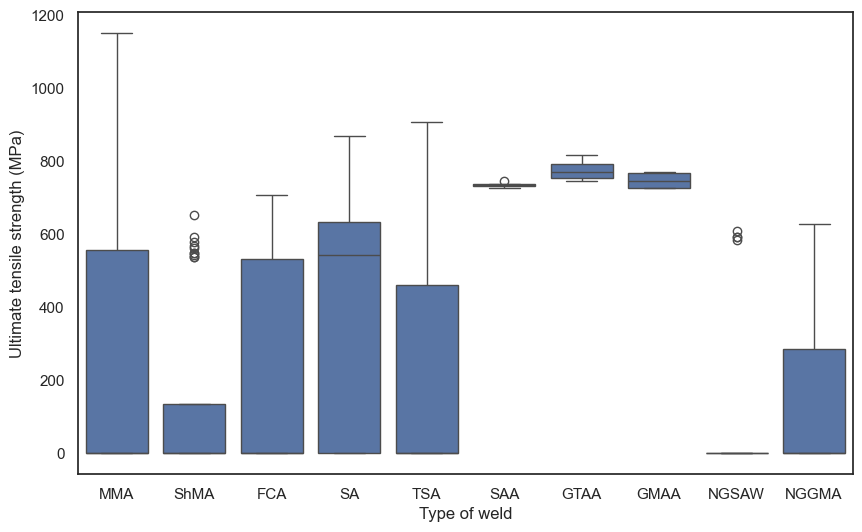

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data_all, x = "Type of weld", y = "Ultimate tensile strength (MPa)")
plt.show()